# COMP377: AI for Software Developers
## Exercise 1: Logistic Regression
### Mid Term Test

Name: Zachary Havers

Student ID: 301202845

Date: 2024-03-07

File Name: ZacharyHavers_COMP-377_MidTermTest_W2024


### Import Libraries

In [65]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

### Part 1: Data Loading

In [66]:
## Part 1: Data Loading ##

from ucimlrepo import fetch_ucirepo 
  
# Fetching DataSet
heart_disease = fetch_ucirepo(id=45) 
  
# Data As Pandas Dataframes
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Printing Meta Data
print(heart_disease.metadata) 
  
# Printing Variables
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

### Part 2: Data Preprocessing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
num
0    160
1    137
Name: count, dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          res

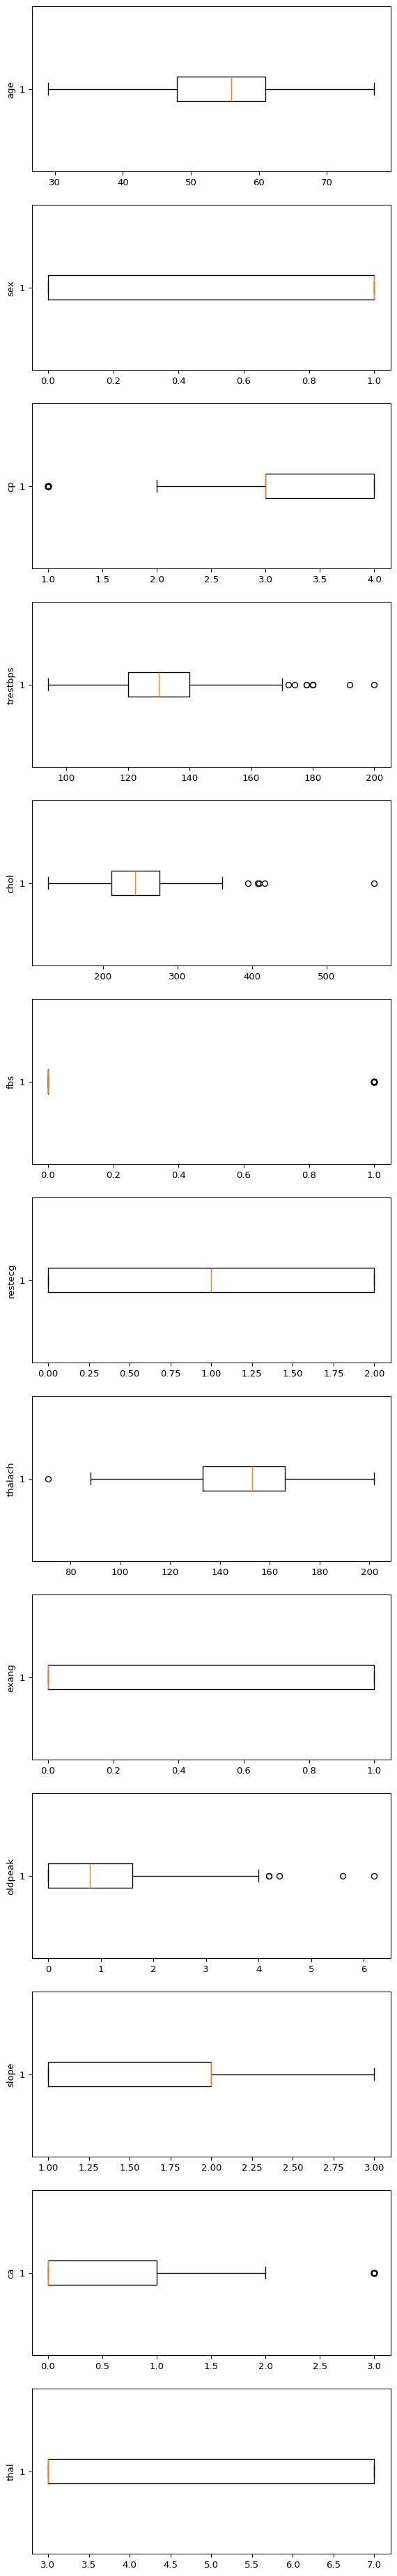

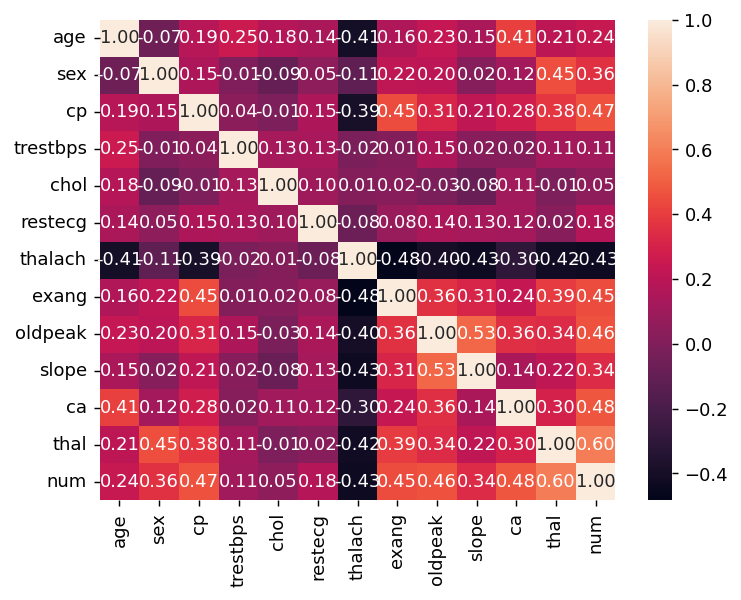

num         1.000000
thal        0.599546
ca          0.475611
cp          0.465692
oldpeak     0.464006
exang       0.445316
sex         0.360315
slope       0.336028
age         0.242075
restecg     0.181185
trestbps    0.112378
chol        0.045846
thalach    -0.431334
Name: num, dtype: float64
age :  38 labels
sex :  2 labels
cp :  3 labels
trestbps :  39 labels
chol :  128 labels
restecg :  3 labels
exang :  2 labels
oldpeak :  34 labels
slope :  3 labels
ca :  3 labels
thal :  3 labels
num :  2 labels


In [67]:
## Part 2: Data Pre-processing ##

# Filtering

# Combine X & Y
data = pd.concat([X, y], axis=1)

# Checking Null Values
print(data.isnull().sum())

# Dropping Null Values
data = data.dropna()

# Modifying The TargetTo Make It Simplier
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Checking The Function Worked
print(data['num'].value_counts())

# Describe To Look For Outliers
print(data.describe())

# Visualizing Outliers
fig, axs = plt.subplots(13, 1, dpi=95, figsize=(7, 50))
for i, col in enumerate(data.columns[:-1]):  
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
plt.show()

# Dropping outliers
for col in data.columns[:-1]:  
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Drop Columns
data.drop(columns=['fbs'], inplace=True)

# Look For Correlations
corr = data.corr()

# Display Heatmap
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# List Correlations
print(corr['num'].sort_values(ascending=False))

# Drop Columns
data.drop(columns=['thalach'], inplace=True)

# Looking For Unique Labels
for col in data.columns:
    print(col, ': ', len(data[col].unique()), 'labels')

# Creating Categorical Columns Object For Encoding
categorical_columns = data.select_dtypes(include=['object']).columns

# Encoding
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

targets = data['num']
features = data.drop(columns=['num'])

scaledFeatures = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaledFeatures, columns=features.columns)


### Part 3: Create and Train Model

In [68]:
## Part 3: Model Training ###

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, targets, test_size=0.25, random_state=0)

# Create Model
logRgMod = LogisticRegression(random_state=0)

# Fit Model
logRgMod.fit(X_train, y_train)

# Test Model
y_pred = logRgMod.predict(X_test)

### Part 4: Test Model

In [69]:
### Part 4: Model Evaluation ###

# Evaluate Using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Confusion Matrix
cnf_matrix


array([[28,  4],
       [ 5, 16]], dtype=int64)

### Part 5: Calculate Accuracy & Accuracy

In [70]:
### Part 5: Model Accuracy ###

# Taregt Labels For Num
target_names = ['0', '1']

# Classification Report 
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.80      0.76      0.78        21

    accuracy                           0.83        53
   macro avg       0.82      0.82      0.82        53
weighted avg       0.83      0.83      0.83        53



### Visualization and Display (Optional)

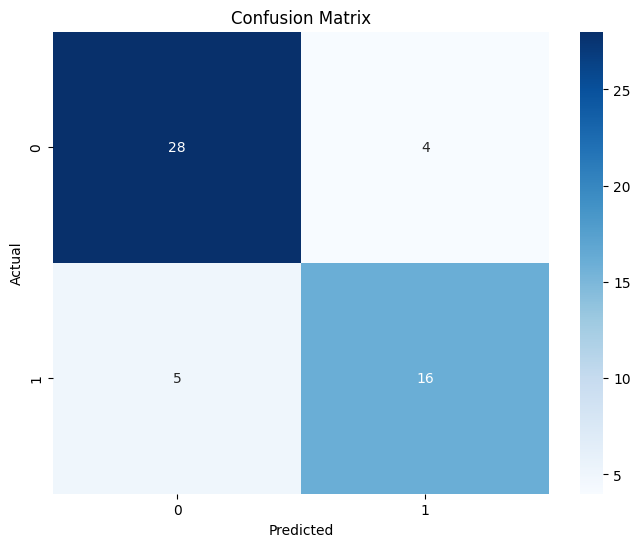

In [71]:
### Visualization & Display ###

## Print Results to the Screen ###

plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Summary and Conclusions

When looking at the data we could see that the column fbs could be removed as it had no correlation to the target. Also Thalach had a negative correlation so that could be removed. We used label encoding to keep all the columns the same and then just encode each unique value with an integer. For the target data I changed it so instead of using 0 to 4 anything greater than 0 would be considered an indicator of heart disease. I felt this was simplier and would make it easier for the model to make a prediction, as the whole goal is to detect anything over a 0 which would mean there is a possibility of heart disease. The model performed well with an accuracy score of 83% and high percsion scores for both predictions ( 0 and 1 ). 